In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

df = pd.read_csv('LosAngeles_Earthquake_Dataset.csv')

# Define features and target variable
X = df.drop(columns=['mag', 'class'])  # All columns except 'mag' and 'class'
y = df['mag']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

print(f'RMSE: {rmse}')

RMSE: 0.4722488060685556


In [17]:
df.columns

Index(['latitude', 'longitude', 'mag', 'clustering_coefficient_30_days',
       'std_mag_30_days', 'rolling_mean_depth_30_days',
       'earthquakes_last_30_days', 'b_value', 'b_value_increment_i_i2',
       'b_value_increment_i2_i4', 'b_value_increment_i4_i6',
       'b_value_increment_i6_i8', 'b_value_increment_i8_i10',
       'max_mag_last_week', 'eta', 'delta_M', 'elapsed_time',
       'coefficient_of_variation', 'dE1_2', 'class'],
      dtype='object')

In [12]:
import numpy as np
X_grid = np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape(len(X_grid),1) 
  
plt.scatter(X,y, color='blue') #plotting real points
plt.plot(X_grid, model.predict(X_grid),color='green') #plotting for predict points
  
plt.title("Random Forest Regression Results")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

TypeError: arange() not supported for inputs with DType <class 'numpy.dtypes.StrDType'>.

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
#tree_to_plot = model.estimators_[0]

# Plot the decision tree
#plt.figure(figsize=(320, 160))
#plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
#plt.title("Decision Tree from Random Forest")
#plt.show()

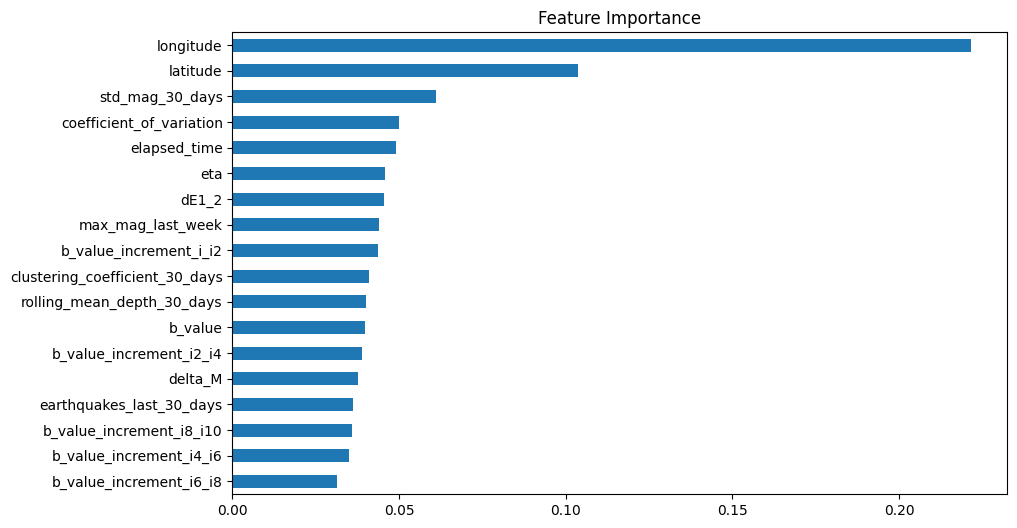

In [18]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance")
plt.show()
# Identifies which features most influence the model's predictions, allowing you to focus on the most critical variables. It also helps in dimensionality reduction by potentially removing less important features.

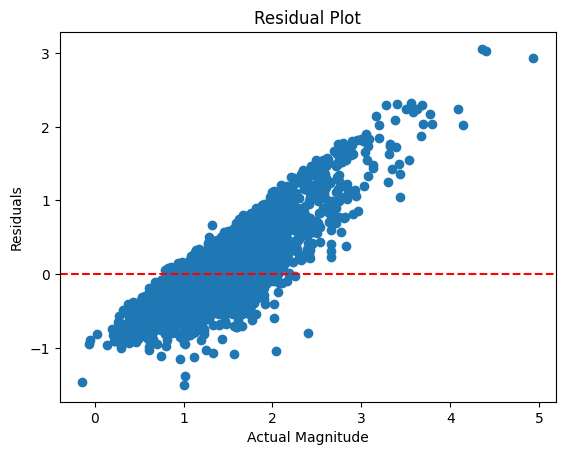

In [19]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Magnitude")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
#

 Identifies which features most influence the model's predictions, allowing you to focus on the most critical variables. It also helps in dimensionality reduction by potentially removing less important features.

In [20]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = (-cv_scores) ** 0.5
print(f"Cross-Validated RMSE: {rmse_scores.mean():.3f} ± {rmse_scores.std():.3f}")

Cross-Validated RMSE: 0.493 ± 0.018


Ensures your model's performance is consistent across different subsets of the dataset, reducing the risk of overfitting or underfitting. It provides a more robust measure of model performance than a single train-test split.


In [22]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')


MAE: 0.34734206038794563


In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')


R²: 0.21124132246406568


MAE: Measures average absolute errors, making it easier to interpret in the context of the data.
R²: Indicates how well the model explains the variance in the data, providing a broader perspective on goodness-of-fit.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regressor": SVR(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
}

for name, reg in models.items():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)**0.5
    print(f"{name} RMSE: {rmse}")


Linear Regression RMSE: 0.47798546898917993
Support Vector Regressor RMSE: 0.534452451019029
Gradient Boosting Regressor RMSE: 0.4704294672808232


Helps determine whether the chosen model (Random Forest in this case) is the best for the dataset. Other models might perform better or be more computationally efficient, depending on the problem.

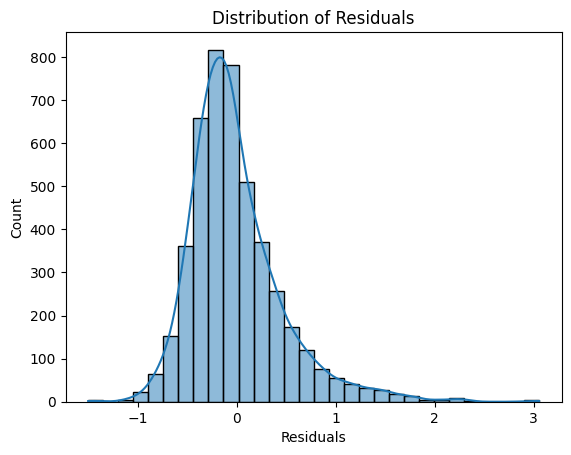

In [27]:
import seaborn as sns
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()


Ensures the errors are normally distributed and unbiased. Skewed error distributions can signal that the model is systematically over- or under-predicting for certain values.


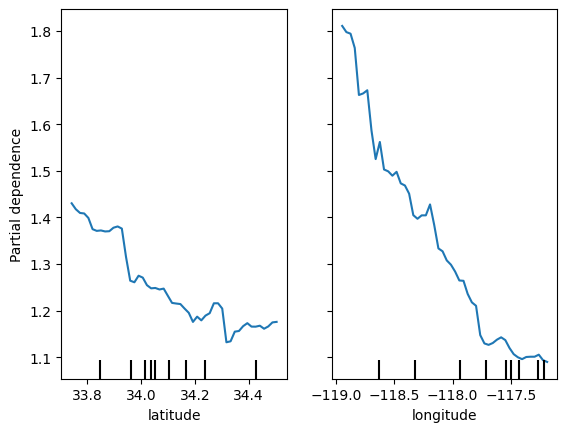

In [28]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(model, X_test, ['latitude', 'longitude'], grid_resolution=50)
plt.show()


Visualizes the relationship between specific features and the target variable, helping you interpret the model's behavior and check if it aligns with domain knowledge.